In [1]:
import pandas as pd 
import numpy as np

import glob
import os
  
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns



Bad key "text.kerning_factor" on line 4 in
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### 0. Functions

In [2]:
def resumetable(df):
    print(f"Dataset Shape: {df.shape}")
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values    
    summary['Uniques'] = df.nunique().values
    summary['First Value'] = df.loc[0].values
    summary['Second Value'] = df.loc[1].values
    summary['Third Value'] = df.loc[2].values


    for name in summary['Name'].value_counts().index:
        summary.loc[summary['Name'] == name, 'Entropy'] = round(stats.entropy(df[name].value_counts(normalize=True), base=2),2) 

    return summary

In [3]:
def CalcOutliers(df_num): 
    '''
    
    Leonardo Ferreira 20/10/2018
    Set a numerical value and it will calculate the upper, lower and total number of outliers
    It will print a lot of statistics of the numerical feature that you set on input
    
    '''
    # calculating mean and std of the array
    data_mean, data_std = np.mean(df_num), np.std(df_num)

    # seting the cut line to both higher and lower values
    # You can change this value
    cut = data_std * 3

    #Calculating the higher and lower cut values
    lower, upper = data_mean - cut, data_mean + cut

    # creating an array of lower, higher and total outlier values 
    outliers_lower = [x for x in df_num if x < lower]
    outliers_higher = [x for x in df_num if x > upper]
    outliers_total = [x for x in df_num if x < lower or x > upper]

    # array without outlier values
    outliers_removed = [x for x in df_num if x > lower and x < upper]
    
    print('Identified lowest outliers: %d' % len(outliers_lower)) # printing total number of values in lower cut of outliers
    print('Identified upper outliers: %d' % len(outliers_higher)) # printing total number of values in higher cut of outliers
    print('Identified outliers: %d' % len(outliers_total)) # printing total number of values outliers of both sides
    print('Non-outlier observations: %d' % len(outliers_removed)) # printing total number of non outlier values
    print("Total percentual of Outliers: ", round((len(outliers_total) / len(outliers_removed) )*100, 4)) # Percentual of outliers in points
    
    return

### 1. Import the dataset

https://github.com/activatedgeek/winemag-dataset

In [4]:
df = pd.concat(map(pd.read_csv, glob.glob(os.path.join('', "*.csv"))), ignore_index=True)

In [5]:
#df = df0.reset_index()
#df.drop(index='index')
df.head()

,alcohol,category,country,description,designation,price,rating,region,subregion,subsubregion,title,url,varietal,vintage,winery
0,14.0,Red,Spain,"Seductive like a trap, meaning the nose is lus...",NaN,36.0,87,Northern Spain,Ribera del Duero,NaN,Arrocal 2004 Ribera del Duero,https://www.winemag.com/buying-guide/arrocal-2...,Tempranillo,2004.0,Arrocal
1,14.8,Red,US,The vineyard is on Atlas Peak. Modern winemaki...,Mountainside Vineyards,50.0,87,California,Napa,Napa Valley,Erba 2003 Mountainside Vineyards Cabernet Sauv...,https://www.winemag.com/buying-guide/erba-2003...,Cabernet Sauvignon,2003.0,Erba
2,NaN,Red,US,"Has true varietal spice, something we don't al...",Limited Release Stepmaker's,14.0,87,California,Central Coast,Central Coast,Concannon 2004 Limited Release Stepmaker's Syr...,https://www.winemag.com/buying-guide/concannon...,Syrah,2004.0,Concannon
3,13.5,Red,Spain,is a nice wine that's at peak maturity. The no...,Reserva,26.0,87,Northern Spain,Ribera del Duero,NaN,San Gabriel 2001 Reserva (Ribera del Duero),https://www.winemag.com/buying-guide/san-gabri...,Tempranillo,2001.0,San Gabriel
4,14.5,Red,Spain,"Alongside open, hefty berry aromas are bramble...",Vendimia Seleccionada,21.0,87,Northern Spain,Ribera del Duero,NaN,Casajús 2005 Vendimia Seleccionada (Ribera de...,https://www.winemag.com/buying-guide/casajus-2...,Tempranillo,2005.0,Casajús


In [36]:
df.shape

(248358, 17)

In [6]:
df['description'][0]

'Seductive like a trap, meaning the nose is lush and full of bacon, cola and blackberry, yet the palate is tannic and shows some serious teeth. The fruit is bold and ripe, and the structure dictates that it be drunk with hearty foods like steak, lamb or burgers.'

### 2. First look at the data

In [7]:
resumetable(df)

Dataset Shape: (248358, 15)


,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value,Entropy
0,alcohol,float64,39142,457,14,14.8,NaN,4.37
1,category,object,0,7,Red,Red,Red,1.46
2,country,object,15,51,Spain,US,US,2.80
3,description,object,1117,246921,"Seductive like a trap, meaning the nose is lus...",The vineyard is on Atlas Peak. Modern winemaki...,"Has true varietal spice, something we don't al...",17.91
4,designation,object,74312,61780,NaN,Mountainside Vineyards,Limited Release Stepmaker's,14.12
5,price,float64,17902,513,36,50,14,5.78
6,rating,int64,0,21,87,87,87,3.70
7,region,object,3686,566,Northern Spain,California,California,4.98
8,subregion,object,39807,1233,Ribera del Duero,Napa,Central Coast,6.71
9,subsubregion,object,145795,261,NaN,Napa Valley,Central Coast,5.84


In [8]:
print("Statistics of numerical data: ")
print(df[['alcohol', 'price', 'rating']].describe())

Statistics of numerical data: 
             alcohol          price         rating
count  209216.000000  230456.000000  248358.000000
mean       13.786055      34.417153      88.226214
std        26.843678      43.591938       3.173780
min         1.500000       4.000000      80.000000
25%        13.000000      16.000000      86.000000
50%        13.500000      25.000000      88.000000
75%        14.400000      40.000000      90.000000
max      8333.000000    6000.000000     100.000000


### 3. Rating distributions

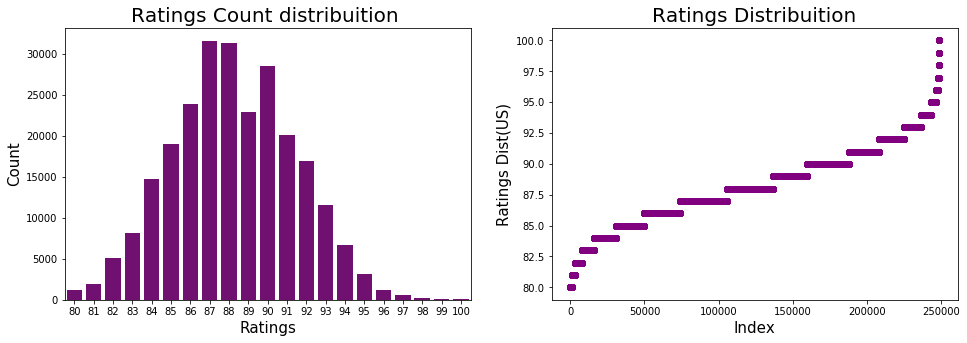

In [9]:
# define the size of figures that I will build
plt.figure(figsize=(16,5))

plt.subplot(1,2,1) # this will create a grid of 1 row and 2 columns; this is the first graphic
g = sns.countplot(x='rating', data=df, color='purple') # seting the seaborn countplot to known the points distribuition
g.set_title("Ratings Count distribuition ", fontsize=20) # seting title and size of font
g.set_xlabel("Ratings", fontsize=15) # seting xlabel and size of font
g.set_ylabel("Count", fontsize=15) # seting ylabel and size of font

plt.subplot(1,2,2)  # this will set the second graphic of our grid
plt.scatter(range(df.shape[0]), np.sort(df.rating.values), color='purple') # creating a cumulative distribution
plt.xlabel('Index', fontsize=15)  # seting xlabel and size of font
plt.ylabel('Ratings Dist(US)', fontsize=15)  # seting ylabel and size of font
plt.title("Ratings Distribuition", fontsize=20) # seting title and size of font

plt.show() #rendering the graphs

In [10]:
# detecting outliers
CalcOutliers(df['rating'])

Identified lowest outliers: 0
Identified upper outliers: 333
Identified outliers: 333
Non-outlier observations: 248025
Total percentual of Outliers:  0.1343


### 4. Prices distributions

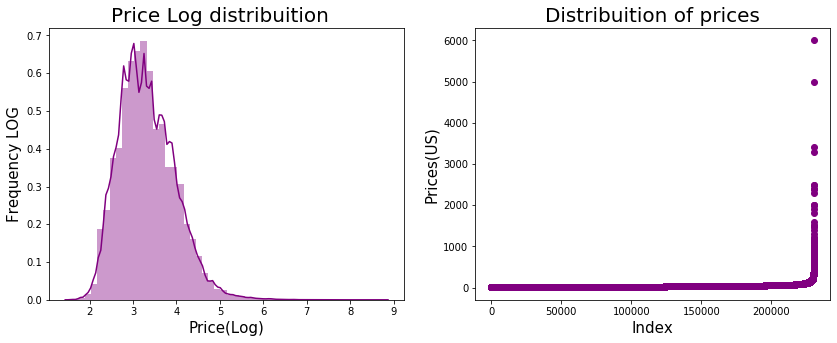

In [11]:
plt.figure(figsize=(14,5))

g1 = plt.subplot(121)
g1 = sns.distplot(np.log(df['price'].dropna() + 1),
                  color='purple')
g1.set_title("Price Log distribuition  ", fontsize=20)
g1.set_xlabel("Price(Log)", fontsize=15)
g1.set_ylabel("Frequency LOG", fontsize=15)

plt.subplot(122)
plt.scatter(range(df.shape[0]), np.sort(df.price.values), 
            color='purple')
plt.xlabel('Index', fontsize=15)
plt.ylabel('Prices(US)', fontsize=15)
plt.title("Distribuition of prices", fontsize=20)


plt.show()

In [12]:
# detecting outliers
CalcOutliers(df['price'])

Identified lowest outliers: 0
Identified upper outliers: 2029
Identified outliers: 2029
Non-outlier observations: 228427
Total percentual of Outliers:  0.8882


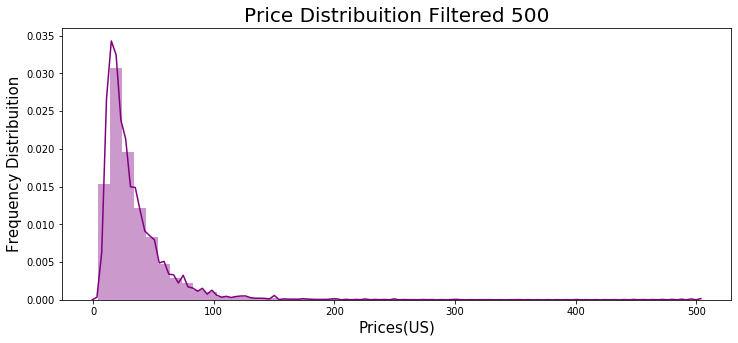

In [13]:
# Filtered distribution of prices

plt.figure(figsize=(12,5))

g = sns.distplot(df[df['price'] < 500]['price'], color='purple')
g.set_title("Price Distribuition Filtered 500", fontsize=20)
g.set_xlabel("Prices(US)", fontsize=15)
g.set_ylabel("Frequency Distribuition", fontsize=15)


plt.show()

In [14]:
df['price_log'] = np.log(df['price'])

### 5. Linear regression of prices vs rating

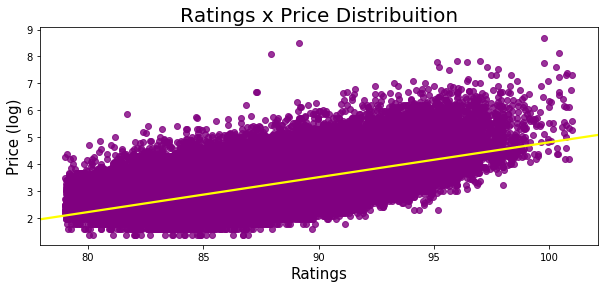

In [15]:


plt.figure(figsize=(10,4))

g = sns.regplot(x='rating', y='price_log', 
                data=df, line_kws={'color':'yellow'},
                x_jitter=True, fit_reg=True, color='purple')
g.set_title("Ratings x Price Distribuition", fontsize=20)
g.set_xlabel("Ratings", fontsize= 15)
g.set_ylabel("Price (log)", fontsize= 15)

plt.show()

### 6. Country

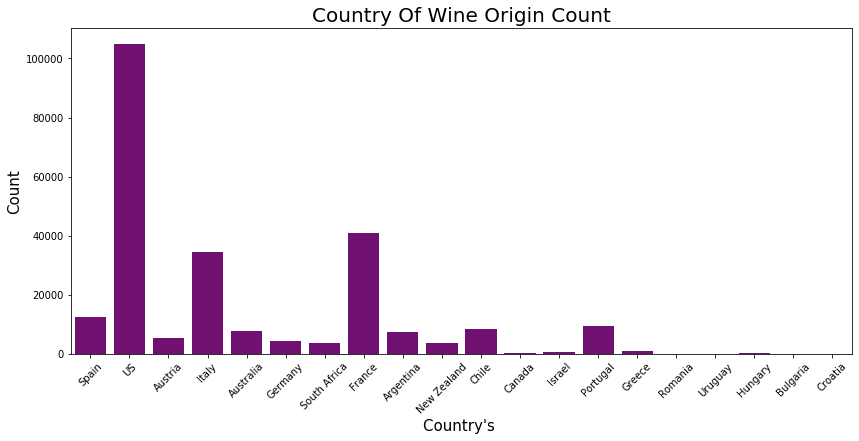

In [16]:
plt.figure(figsize=(14,6))

country = df.country.value_counts()[:20]

g = sns.countplot(x='country', 
                  data=df[df.country.isin(country.index.values)],
                 color='purple')
g.set_title("Country Of Wine Origin Count", fontsize=20)
g.set_xlabel("Country's ", fontsize=15)
g.set_ylabel("Count", fontsize=15)
g.set_xticklabels(g.get_xticklabels(),rotation=45)

plt.show()

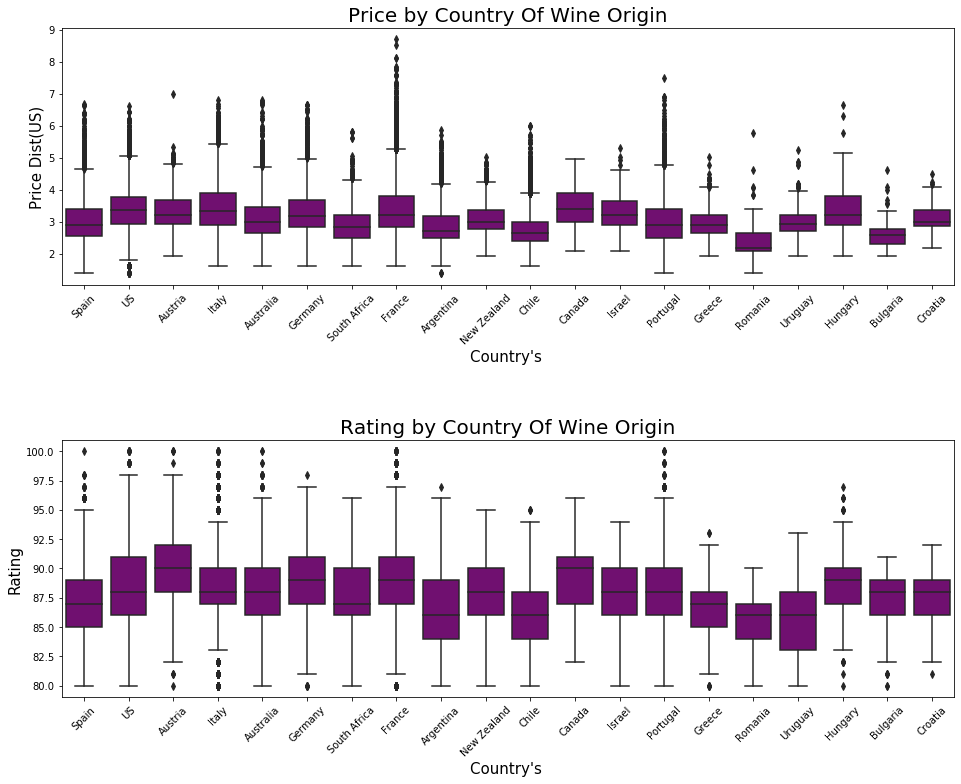

In [17]:

plt.figure(figsize=(16,12))

plt.subplot(2,1,1)
g = sns.boxplot(x='country', y='price_log',
                  data=df.loc[(df.country.isin(country.index.values))],
                 color='purple')
g.set_title("Price by Country Of Wine Origin", fontsize=20)
g.set_xlabel("Country's ", fontsize=15)
g.set_ylabel("Price Dist(US)", fontsize=15)
g.set_xticklabels(g.get_xticklabels(),rotation=45)

plt.subplot(2,1,2)
g1 = sns.boxplot(x='country', y='rating',
                   data=df[df.country.isin(country.index.values)],
                 color='purple')
g1.set_title("Rating by Country Of Wine Origin", fontsize=20)
g1.set_xlabel("Country's ", fontsize=15)
g1.set_ylabel("Rating", fontsize=15)
g1.set_xticklabels(g1.get_xticklabels(),rotation=45)

plt.subplots_adjust(hspace = 0.6,top = 0.9)

plt.show()


### 7. Description lenght vs rating

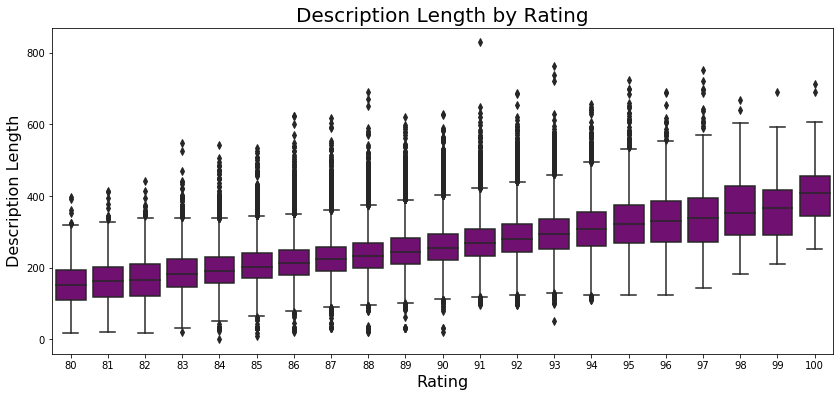

In [18]:
df = df.assign(desc_length = df['description'].dropna().apply(len))

plt.figure(figsize=(14,6))
g = sns.boxplot(x='rating', y='desc_length', data=df, color='purple')
g.set_title('Description Length by Rating', fontsize=20)
g.set_ylabel('Description Length', fontsize = 16) # Y label
g.set_xlabel('Rating', fontsize = 16) # X label
plt.show()

### 8. Linear regressin of Price by Description Lenght

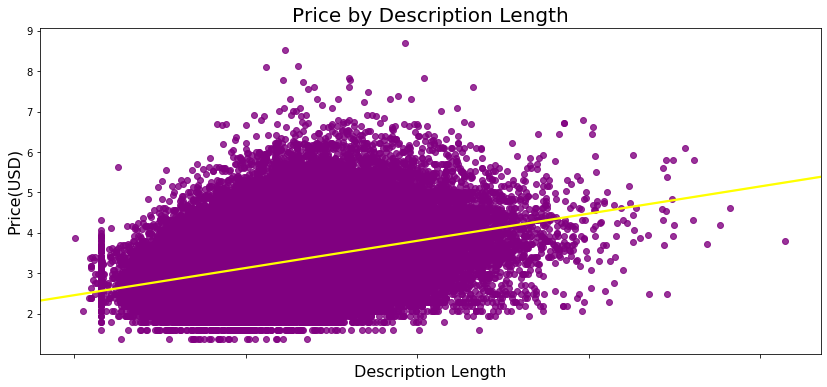

In [19]:
plt.figure(figsize=(14,6))

g = sns.regplot(x='desc_length', y='price_log', line_kws={'color':'yellow'},
                data=df, fit_reg=True, color='purple', )
g.set_title('Price by Description Length', fontsize=20)
g.set_ylabel('Price(USD)', fontsize = 16) 
g.set_xlabel('Description Length', fontsize = 16)
g.set_xticklabels(g.get_xticklabels(),rotation=45)

plt.show()

### 9. Word cloud of decriptions

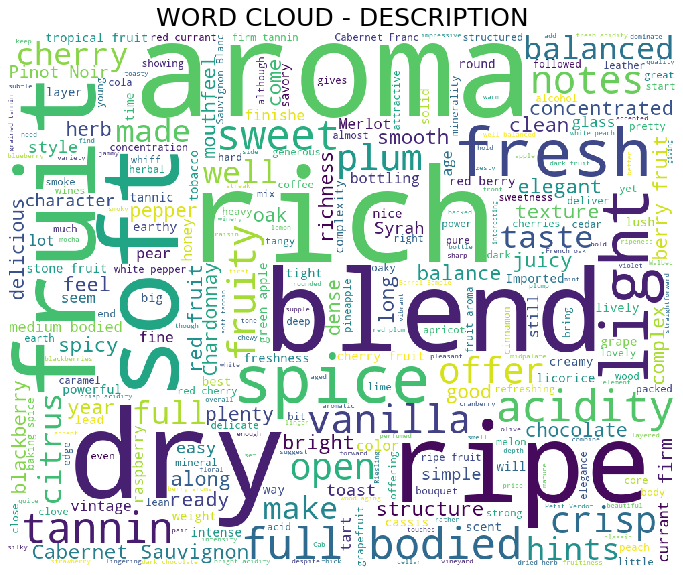

In [20]:
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)

newStopWords = ["Drink", "black", 'wine', 'drink', 'finish', 'flavor', 'palate',
                'flavors', 'now', 'hint', 'show', 'nose', 'mouth', 'shows', 'note', 'give', 'touch', 'one']

stopwords.update(newStopWords)

wordcloud = WordCloud(
    background_color='white',
    stopwords=stopwords,
    max_words=300,
    max_font_size=200, 
    width=1000, height=800,
    random_state=42,
).generate(" ".join(df['description'].astype(str)))

print(wordcloud)
fig = plt.figure(figsize = (12,14))
plt.imshow(wordcloud)
plt.title("WORD CLOUD - DESCRIPTION",fontsize=25)
plt.axis('off')
plt.show()

### 10. Description N-gram

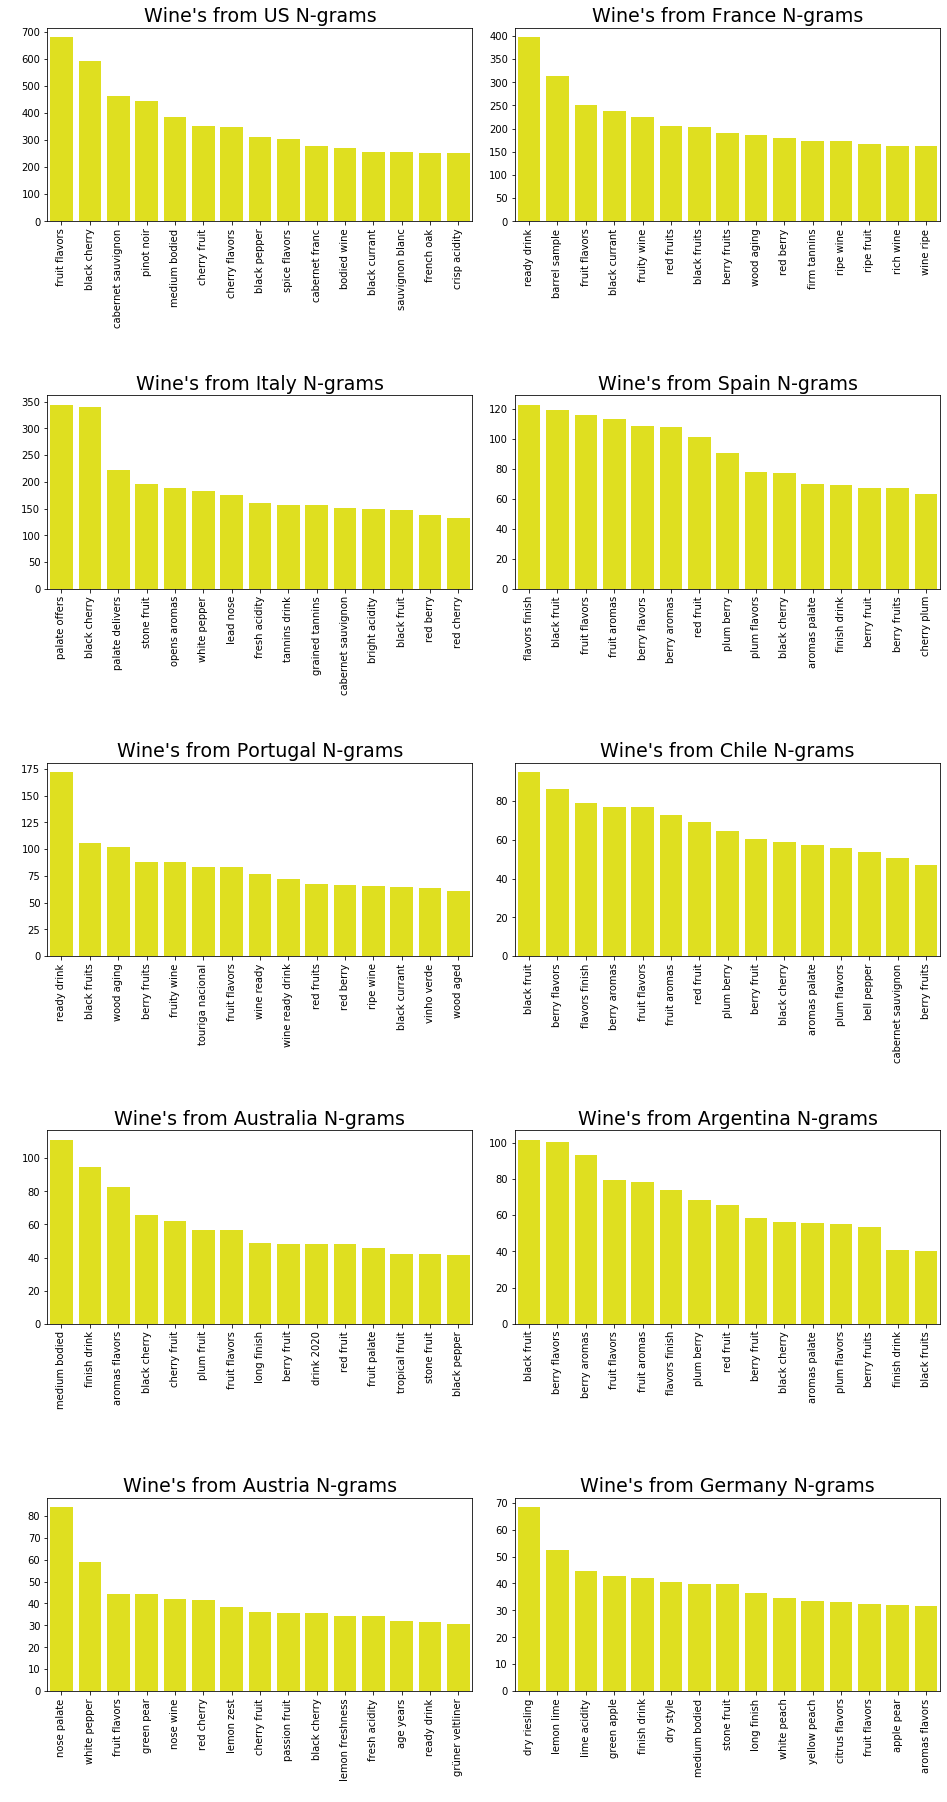

In [21]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.gridspec as gridspec # to do the grid of plots

grid = gridspec.GridSpec(5, 2)
plt.figure(figsize=(16,7*4))

for n, cat in enumerate(country.index[:10]):
    
    ax = plt.subplot(grid[n])   
    # print(f'PRINCIPAL WORDS CATEGORY: {cat}')
    # vectorizer = CountVectorizer(ngram_range = (3,3)) 
    # X1 = vectorizer.fit_transform(df_train[df_train['host_cat'] == cat]['answer'])  
    # print(cat)
    # Applying TFIDF 
    vectorizer = TfidfVectorizer(ngram_range = (2, 3), min_df=5, 
                                 stop_words='english',
                                 max_df=.5) 
    
    X2 = vectorizer.fit_transform(df.loc[(df['country'] == cat)]['description'].dropna()) 
    features = (vectorizer.get_feature_names()) 
    scores = (X2.toarray()) 
    
    # Getting top ranking features 
    sums = X2.sum(axis = 0) 
    data1 = [] 
    
    for col, term in enumerate(features): 
        data1.append( (term, sums[0,col] )) 

    ranking = pd.DataFrame(data1, columns = ['term','rank']) 
    words = (ranking.sort_values('rank', ascending = False))[:15]
    
    sns.barplot(x='term', y='rank', data=words, ax=ax, 
                color='yellow', orient='v')
    ax.set_title(f"Wine's from {cat} N-grams", fontsize=19)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
    ax.set_ylabel(' ')
    ax.set_xlabel(" ")

plt.subplots_adjust(top = 0.95, hspace=.9, wspace=.1)

plt.show()

### 10. Sentiment Analysis

In [34]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

SIA = SentimentIntensityAnalyzer()

# Applying Model, Variable Creation
sentiment = df.sample(15000).copy()
sentiment['polarity_score']=sentiment.description.apply(lambda x:SIA.polarity_scores(str(x))['compound'])
sentiment['neutral_score']=sentiment.description.apply(lambda x:SIA.polarity_scores(str(x))['neu'])
sentiment['negative_score']=sentiment.description.apply(lambda x:SIA.polarity_scores(str(x))['neg'])
sentiment['positive_score']=sentiment.description.apply(lambda x:SIA.polarity_scores(str(x))['pos'])

sentiment['sentiment']= np.nan
sentiment.loc[sentiment.polarity_score<0,'sentiment']='NEGATIVE'
sentiment.loc[sentiment.polarity_score==0,'sentiment']='NEUTRAL'
sentiment.loc[sentiment.polarity_score>0,'sentiment']='POSITIVE'

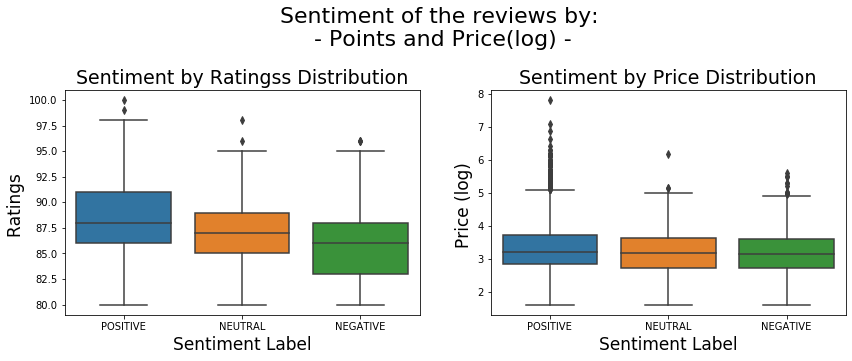

In [37]:
plt.figure(figsize=(14,5))

plt.suptitle('Sentiment of the reviews by: \n- Points and Price(log) -', size=22)

plt.subplot(121)
ax = sns.boxplot(x='sentiment', y='rating', data=sentiment)
ax.set_title("Sentiment by Ratingss Distribution", fontsize=19)
ax.set_ylabel("Ratings ", fontsize=17)
ax.set_xlabel("Sentiment Label", fontsize=17)

plt.subplot(122)
ax1= sns.boxplot(x='sentiment', y='price_log', data=sentiment)
ax1.set_title("Sentiment by Price Distribution", fontsize=19)
ax1.set_ylabel("Price (log) ", fontsize=17)
ax1.set_xlabel("Sentiment Label", fontsize=17)

plt.subplots_adjust(top = 0.75, wspace=.2)
plt.show()

In [23]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/joao/nltk_data...


True